Gerekli kütüphanelerin yüklenmesi için yazılan kodlar.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
import keras
import time
from keras import metrics

Masaüstümde oluşturduğum "diabet_data" isimli klasörüme 4 csv dosyasını indirdim. earLobe.csv, innerArm.csv, thumbNail.csv, vein.csv.
Bu dosyaları okumak adına gerekli kodları aşağıdaki gibi yazdım. Her dosya kendi feature ve label DataFrameine sahip olacak şekilde
formatını gerçekleştirdim.

data0-target0 --->earLobe.csv
.......data1-target1 ---> innerArm.csv
.......data2-target2 ---> thumbNail.csv
.......data3-target3 --->vein.csv

In [ ]:
main_path = "C:/Users/sarsi/Desktop/diabet_data"
list_filenames= os.listdir(main_path)
df0 = pd.read_csv(main_path + "/" + list_filenames[0])
df1 = shuffle(df0.iloc[1:,:])
data0 = np.array(df1.iloc[:,1:])
target0 = np.array(df1.iloc[:,1])

df1 = pd.read_csv(main_path + "/" + list_filenames[1])
df2 = shuffle(df1.iloc[1:,:])
data1 = np.array(df2.iloc[:,1:])
target1 = np.array(df2.iloc[:,1])

df2 = pd.read_csv(main_path + "/" + list_filenames[2])
df3 = shuffle(df2.iloc[1:,:])
data2 = np.array(df3.iloc[:,1:])
target2 = np.array(df3.iloc[:,1])

df3 = pd.read_csv(main_path + "/" + list_filenames[3])
df4 = shuffle(df3.iloc[1:,:])
data3 = np.array(df4.iloc[:,1:])
target3 = np.array(df4.iloc[:,1])



Feature matrislerimizi daha efektif şekilde modelimize sokabilmek için scaler fonksiyonumuzu tanımlıyoruz. 

In [13]:
from sklearn.preprocessing import StandardScaler
def scaler(x):
    sc = StandardScaler()
    sc.fit(x)
    x_std = sc.transform(x)
    return x_std
data1_std = scaler(data1)

Sahip olduğumuz feature matrisleri fazlaca sütuna(dolayısıyla fazlasıyla feature) sahip olduğunundan dimension reduction
tekniklerinden olan pca(principal component analysis) ile az sütunla çok şeyi açıklayan ve özellik barındıran matrisimizi bulduk. 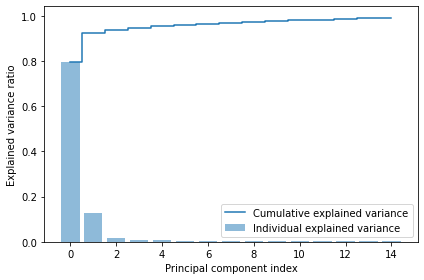

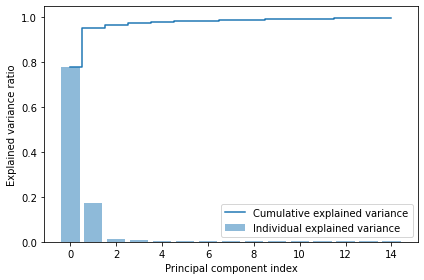

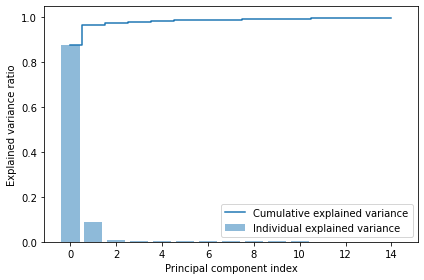

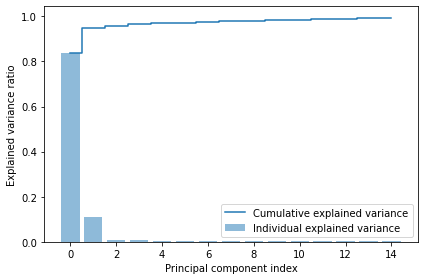

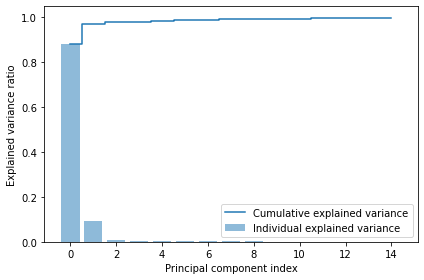

In [15]:
from sklearn.decomposition import PCA
def pca(data, n_components):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(scaler(data))
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return data_pca
data0_pca = pca(data0, 15)
data1_pca = pca(data1, 15)
data2_pca = pca(data2, 15)
data3_pca = pca(data3, 15)


Sahip olduğumuz verisetine bir model uyduracağımız. Peki hangi sınıflandırma algoritmaları başlayabiliriz. Birçok sınıflandırma 
türünden hangisiyle dikeyine geliştirmeler yapabiliriz. İlk bakışta bunu anlamamızı sağlayan ve bize gerekli verileri sunan bir 
fonksiyon kullandım. "polyssifier" Bilgisayarınıza inmiş bir kütüphane olmamış olabileceğinden detaylarını ve bana nasıl yardımcı olduğunu sunumumu gerçekleştirirken anlatabilirim. Öncesinde aşağıya önizleme olsun diye birkaç yardımcı parça bırakıyorum. 
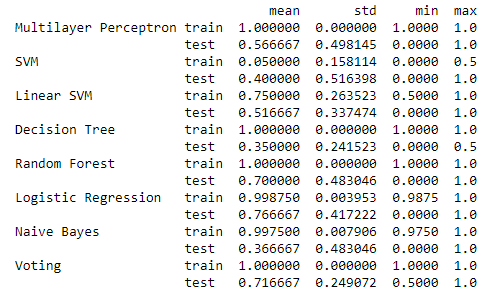 

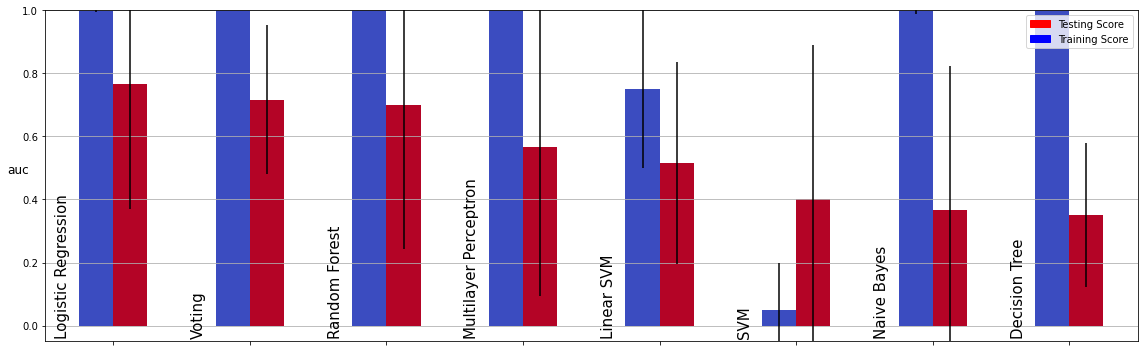

2021-09-27 17:44:45,417 - polyssifier - INFO - Building classifiers ...
2021-09-27 17:44:45,516 - polyssifier - INFO - Initialization, done.
C:\Users\sarsi\.conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
2021-09-27 17:44:46,170 - polyssifier - INFO - Training Multilayer Perceptron 0
2021-09-27 17:44:58,843 - polyssifier - INFO - Multilayer Perceptron      0: Train 1.00/Test 0.67, 12.67 sec
2021-09-27 17:44:58,848 - polyssifier - INFO - Training Multilayer Perceptron 1
2021-09-27 17:45:11,754 - polyssifier - INFO - Multilayer Perceptron      1: Train 1.00/Test 1.00, 12.91 sec
2021-09-27 17:45:11,760 - polyssifier - INFO - Training Multilayer Perceptron 2
2021-09-27 17:45:20,011 - polyssifier - INFO - Multilayer Perceptron      2: Train 1.00/Test 0.00, 8.25 sec
2021-09-27 17:45:20,019 - polyssifier - 

predict proba return shape (2,)


2021-09-27 17:46:48,394 - polyssifier - INFO - Linear SVM                 1: Train 1.00/Test 1.00, 0.24 sec
2021-09-27 17:46:48,403 - polyssifier - INFO - Training Linear SVM 2


predict proba return shape (2,)


2021-09-27 17:46:48,708 - polyssifier - INFO - Linear SVM                 2: Train 1.00/Test 1.00, 0.31 sec
2021-09-27 17:46:48,715 - polyssifier - INFO - Training Linear SVM 3


predict proba return shape (2,)


2021-09-27 17:46:49,028 - polyssifier - INFO - Linear SVM                 3: Train 1.00/Test 1.00, 0.31 sec
2021-09-27 17:46:49,037 - polyssifier - INFO - Training Linear SVM 4


predict proba return shape (2,)


2021-09-27 17:46:49,376 - polyssifier - INFO - Linear SVM                 4: Train 1.00/Test 1.00, 0.34 sec
2021-09-27 17:46:49,383 - polyssifier - INFO - Training Linear SVM 5


predict proba return shape (2,)


2021-09-27 17:46:49,688 - polyssifier - INFO - Linear SVM                 5: Train 1.00/Test 1.00, 0.30 sec
2021-09-27 17:46:49,695 - polyssifier - INFO - Training Linear SVM 6


predict proba return shape (2,)


2021-09-27 17:46:49,962 - polyssifier - INFO - Linear SVM                 6: Train 1.00/Test 1.00, 0.27 sec
2021-09-27 17:46:49,971 - polyssifier - INFO - Training Linear SVM 7


predict proba return shape (2,)


2021-09-27 17:46:50,241 - polyssifier - INFO - Linear SVM                 7: Train 1.00/Test 1.00, 0.27 sec
2021-09-27 17:46:50,248 - polyssifier - INFO - Training Linear SVM 8


predict proba return shape (2,)


2021-09-27 17:46:50,563 - polyssifier - INFO - Linear SVM                 8: Train 1.00/Test 1.00, 0.32 sec
2021-09-27 17:46:50,570 - polyssifier - INFO - Training Linear SVM 9


predict proba return shape (2,)


2021-09-27 17:46:50,902 - polyssifier - INFO - Linear SVM                 9: Train 1.00/Test 1.00, 0.33 sec
2021-09-27 17:46:50,909 - polyssifier - INFO - Training Decision Tree 0
2021-09-27 17:46:50,975 - polyssifier - INFO - Decision Tree              0: Train 1.00/Test 0.67, 0.07 sec
2021-09-27 17:46:50,982 - polyssifier - INFO - Training Decision Tree 1
2021-09-27 17:46:50,998 - polyssifier - INFO - Decision Tree              1: Train 1.00/Test 0.00, 0.02 sec
2021-09-27 17:46:51,012 - polyssifier - INFO - Training Decision Tree 2
2021-09-27 17:46:51,038 - polyssifier - INFO - Decision Tree              2: Train 1.00/Test 0.00, 0.03 sec
2021-09-27 17:46:51,046 - polyssifier - INFO - Training Decision Tree 3
2021-09-27 17:46:51,072 - polyssifier - INFO - Decision Tree              3: Train 1.00/Test 0.50, 0.02 sec
2021-09-27 17:46:51,082 - polyssifier - INFO - Training Decision Tree 4


predict proba return shape (2,)


2021-09-27 17:46:51,105 - polyssifier - INFO - Decision Tree              4: Train 1.00/Test 0.50, 0.02 sec
2021-09-27 17:46:51,114 - polyssifier - INFO - Training Decision Tree 5
2021-09-27 17:46:51,136 - polyssifier - INFO - Decision Tree              5: Train 1.00/Test 0.50, 0.02 sec
2021-09-27 17:46:51,147 - polyssifier - INFO - Training Decision Tree 6
2021-09-27 17:46:51,169 - polyssifier - INFO - Decision Tree              6: Train 1.00/Test 0.50, 0.02 sec
2021-09-27 17:46:51,179 - polyssifier - INFO - Training Decision Tree 7
2021-09-27 17:46:51,199 - polyssifier - INFO - Decision Tree              7: Train 1.00/Test 1.00, 0.02 sec
2021-09-27 17:46:51,207 - polyssifier - INFO - Training Decision Tree 8
2021-09-27 17:46:51,230 - polyssifier - INFO - Decision Tree              8: Train 1.00/Test 0.00, 0.02 sec
2021-09-27 17:46:51,244 - polyssifier - INFO - Training Decision Tree 9
2021-09-27 17:46:51,267 - polyssifier - INFO - Decision Tree              9: Train 1.00/Test 0.00, 0

                                 mean       std      min     max
Multilayer Perceptron train  1.000000  0.000000  1.00000  1.0000
                      test   0.466667  0.501848  0.00000  1.0000
SVM                   train  0.282238  0.123518  0.10000  0.4625
                      test   0.500000  0.527046  0.00000  1.0000
Linear SVM            train  1.000000  0.000000  1.00000  1.0000
                      test   1.000000  0.000000  1.00000  1.0000
Decision Tree         train  1.000000  0.000000  1.00000  1.0000
                      test   0.366667  0.349603  0.00000  1.0000
Random Forest         train  0.997500  0.006038  0.98125  1.0000
                      test   0.500000  0.527046  0.00000  1.0000
Logistic Regression   train  0.912500  0.116070  0.73750  1.0000
                      test   0.566667  0.498145  0.00000  1.0000
Naive Bayes           train  1.000000  0.000000  1.00000  1.0000
                      test   1.000000  0.000000  1.00000  1.0000
Voting                tra

2021-09-27 17:47:11,075 - Report - INFO - Plotting Linear SVM coefs to temp_Linear SVM_feature_ranking.png
2021-09-27 17:47:11,482 - Report - INFO - Plotting Decision Tree coefs to temp_Decision Tree_feature_ranking.png
2021-09-27 17:47:11,854 - Report - INFO - Plotting Random Forest coefs to temp_Random Forest_feature_ranking.png
2021-09-27 17:47:12,220 - Report - INFO - Plotting Logistic Regression coefs to temp_Logistic Regression_feature_ranking.png


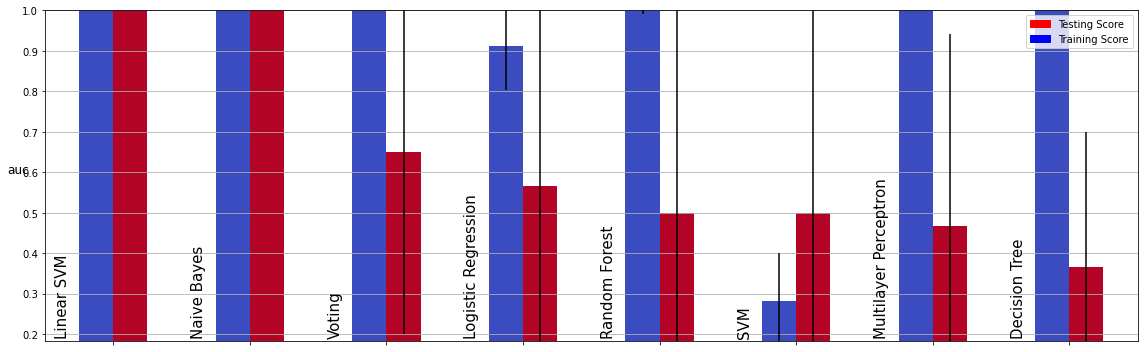

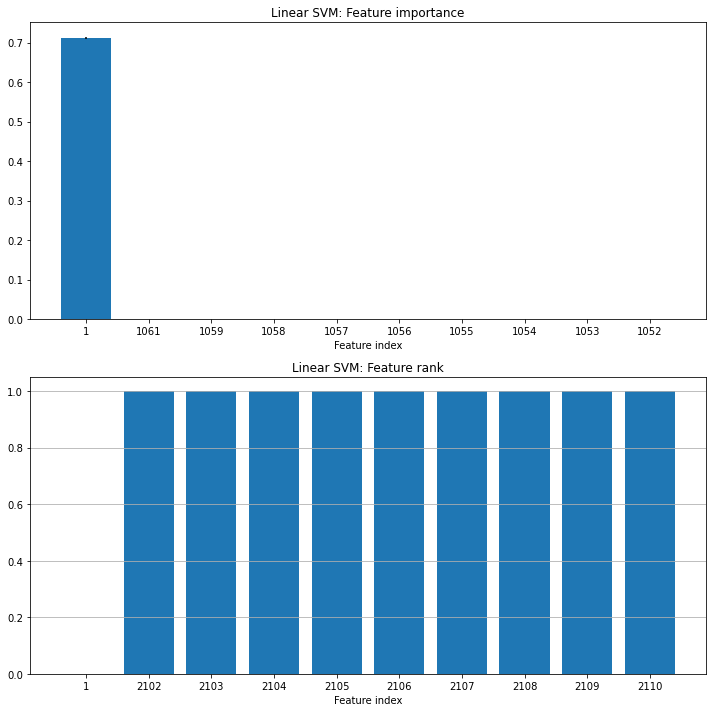

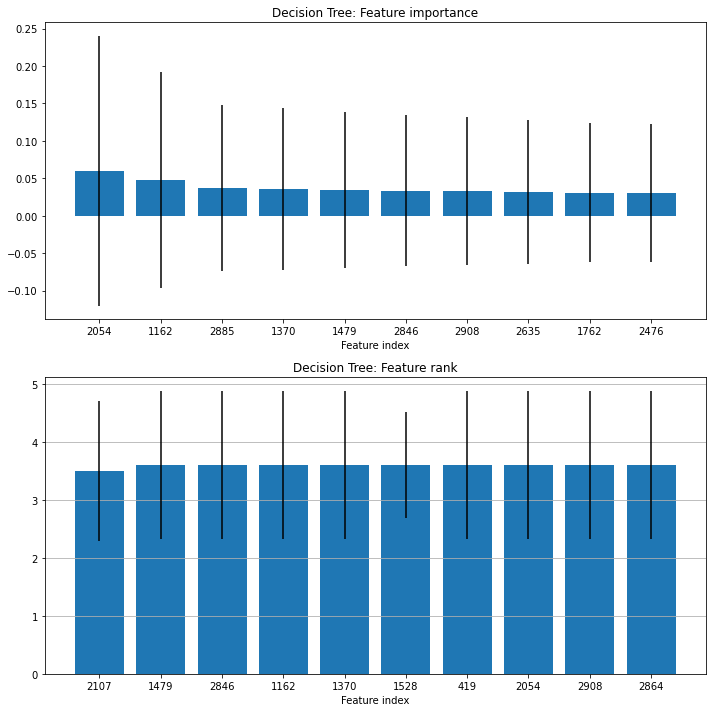

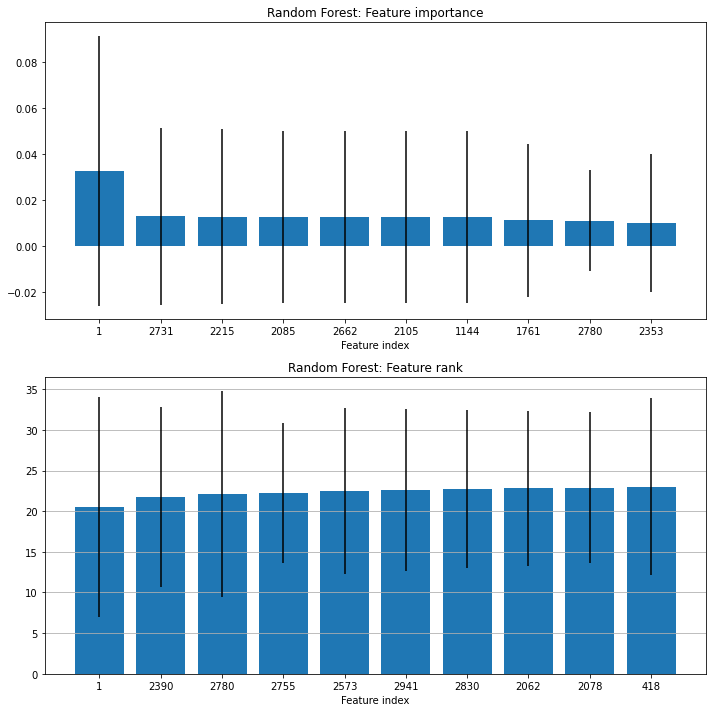

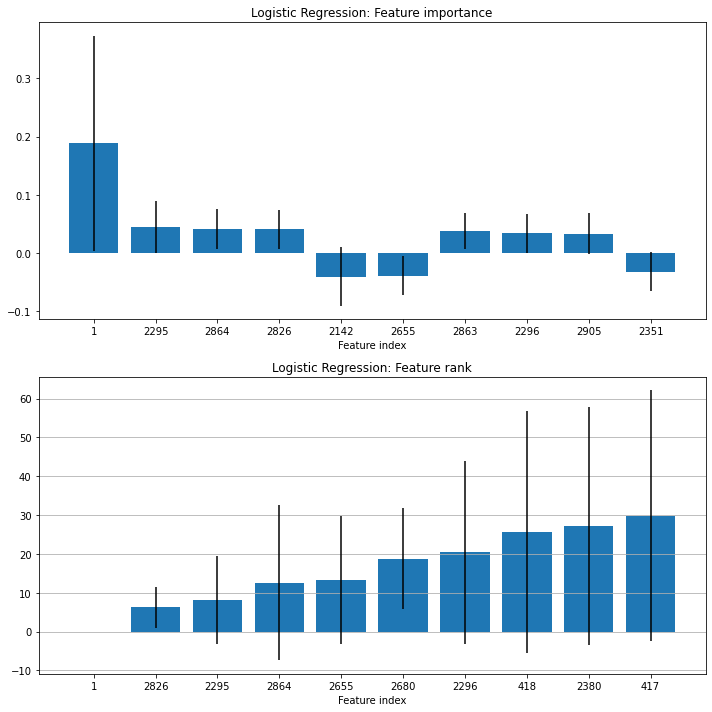

In [16]:
from polyssifier import poly
def polyssifier(x,y):
    report = poly(x,y, n_folds=10, exclude=['Nearest Neighbors'])
    report.plot_scores()
    report.plot_features(ntop=10)
polyssifier(data0, target0)    # 0 numaralı verisetini(earLobe.csv) örnek olarak kullandım.

Polyssifier bana kullanabileceğim yöntemler arasında birkaç yol gösterdi. Bunlar arasında "karar ağacı yöntemi ile sınıflandırma"
da vardı. O yüzden karar ağacı algoritmasının farklı hyperparametrelerle bana ne kadar ışık göstereceğini görmem adına aşağıdaki kodu
hazırladım. Burada farklı "tree depth" ile ne kadar doğruluk başarabileceğimi gördüm.  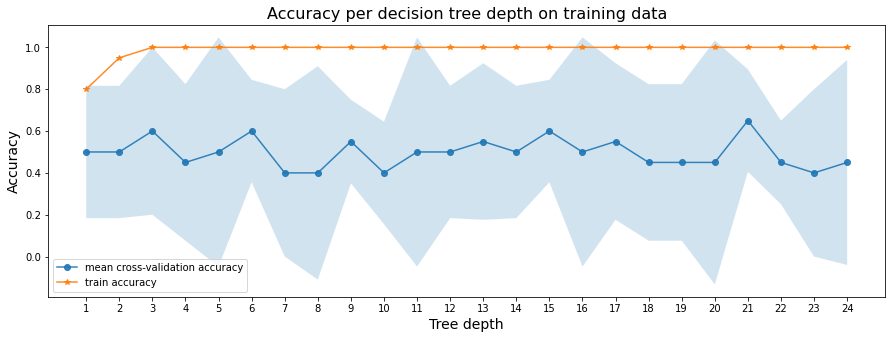

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score


def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(data1_pca, target1, sm_tree_depths)

plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


İkinci modelim olan neural network için girişimlerime başladım. Burada fazlaca hyperparametremiz olacağı için her önemli parametre adına farklı şekilde "search kodları" yazdım.
Aşağıda, kullandığımız pca(principal component analysis)da seçerek alacağımız kaç tane feature olacağı ve bu seçimin bizim modelimizi nasıl etkileyeceği konusunda 
analiz yaparak optimum değeri bulmaya çalıştım.(PCA(n_components = 15) olması gerektiği sonucuna vardım.) 

In [19]:
def pca_search(data, target):
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(14, activation = 'relu'),
                                        tf.keras.layers.Dense(1, activation = "sigmoid")])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.005),
                  loss = "binary_crossentropy",
                  metrics=['accuracy'])
    accuracy_per_fold = list()
    from sklearn.model_selection import KFold
    n_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True)

    for train, test in kfold.split(data, target):
        model.fit(data[train], target[train],epochs = 50)
        scores = model.evaluate(data[test], target[test], verbose=0)
        accuracy_per_fold.append(scores[1] * 100)
    mean_test_accuracy_score = sum(np.array(accuracy_per_fold))/len(accuracy_per_fold)
    return mean_test_accuracy_score

from sklearn.decomposition import PCA

listem = list()
for i in range(2, 21):
    n_com = i
    pca = PCA(n_components=n_com)
    data1 = pca.fit_transform(data1_std)
    listem.append(pca_search(data1_std, target1))
    
plt.plot(range(2,21), np.array(listem), color = "red")
    

NameError: name 'num_folds' is not defined

Aşağıda, kullandığımız modeldeki layer'da kaç tane gizli birimin(hidden units) olacağını tespit etmek amaçlı bir search yaptım. Bu seçimin bizim modelimizi nasıl etkileyeceği konusunda analiz yaparak optimum değeri bulmaya çalıştım. Optimum değerin 14 tane gizli birim olması gerektiği sonucunda ulaştım.

In [ ]:
def deepness_search(deep):
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(deep, activation = 'relu'),
                                        tf.keras.layers.Dense(1, activation = "sigmoid")])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(
        learning_rate=0.005),
                  loss = "binary_crossentropy",
                  metrics=['accuracy'])


    acc_per_fold = list()


    from sklearn.model_selection import KFold
    n_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True)

    for train, test in kfold.split(X_pca, target):
        model.fit(X_pca[train], target[train],epochs = 50, verbose = 0)
        scores = model.evaluate(X_pca[test], target[test], verbose=0)
        acc_per_fold.append(scores[1] * 100)
    acc_per_fold = sum(np.array(acc_per_fold))/len(acc_per_fold)
    return acc_per_fold


listem = list()
for i in range(6, 25):
    listem.append(deepness_search(i))
    
plt.plot(range(2,21), np.array(listem), color = "red")
    

Aynı zamanda diğer parametreler için de optimum değeri bulmamız amaçlı kod ile araştırmalar yaptım fakat sunduğum belgenin uzamaması adına
hepsini dahil etmedim raporuma.

Ve burada sonuca ulaştığımız 14 gizli birimden oluşan 1 gizli katmana sahip sinir ağının modelinin kodu bulunmakta. Uygun "loss, optimizer, kfold değeri" bulunarak model optimize edilmeye çalışıldı.

Tek bir veri seti üzerinden anlatacak olursam(4 taneden 1'i):
20 satırlı verimizde "kfold cross validation" kullanılarak(num_folds = 10), 1 fold test kümesine, diğer foldlar da eğitim kümesine ayrıldı. Bu foldlar üzerinde epochs = 50 defa itere edilerek uygun accuracy değerine ulaşıldı. 


Sonuç aşağıdaki gibidir:
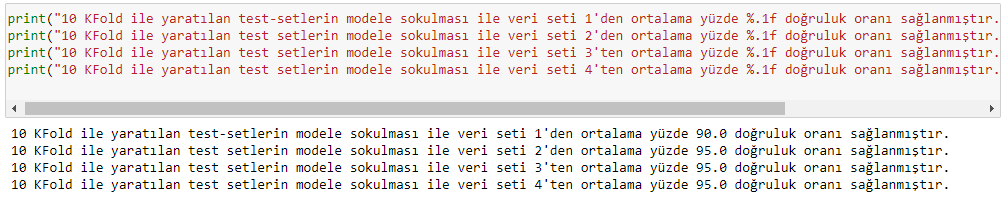

In [17]:
def my_model(data, target):
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(14, activation = 'relu'),
                                        tf.keras.layers.Dense(1, activation = "sigmoid")])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005), loss = "binary_crossentropy", metrics=['accuracy'])


    accuracy_per_fold = list()
    from sklearn.model_selection import KFold
    num_folds = 10
    kfold = KFold(n_splits=num_folds, shuffle=True)
    for train, test in kfold.split(data, target):
        model.fit(data[train], target[train],epochs = 50, verbose = 0)
        scores = model.evaluate(data[test], target[test], verbose=0)
        accuracy_per_fold.append(scores[1] * 100)
    mean_test_accuracy_score = sum(np.array(accuracy_per_fold))/len(accuracy_per_fold)
    return mean_test_accuracy_score

In [18]:
print("10 KFold ile yaratılan test-setlerin modele sokulması ile veri seti 1'den ortalama yüzde %.1f doğruluk oranı sağlanmıştır."%(my_model(data0_pca, target0)))
print("10 KFold ile yaratılan test setlerin modele sokulması ile veri seti 2'den ortalama yüzde %.1f doğruluk oranı sağlanmıştır."%(my_model(data1_pca, target1)))
print("10 KFold ile yaratılan test setlerin modele sokulması ile veri seti 3'ten ortalama yüzde %.1f doğruluk oranı sağlanmıştır."%(my_model(data2_pca, target2)))
print("10 KFold ile yaratılan test setlerin modele sokulması ile veri seti 4'ten ortalama yüzde %.1f doğruluk oranı sağlanmıştır."%(my_model(data3_pca, target3)))


10 KFold ile yaratılan test-setlerin modele sokulması ile veri seti 1'den ortalama yüzde 85.0 doğruluk oranı sağlanmıştır.
10 KFold ile yaratılan test setlerin modele sokulması ile veri seti 2'den ortalama yüzde 95.0 doğruluk oranı sağlanmıştır.
10 KFold ile yaratılan test setlerin modele sokulması ile veri seti 3'ten ortalama yüzde 95.0 doğruluk oranı sağlanmıştır.
10 KFold ile yaratılan test setlerin modele sokulması ile veri seti 4'ten ortalama yüzde 95.0 doğruluk oranı sağlanmıştır.
